## Read and plot data
The file ex1data1.csv contains dataset 
first column is population in a city ;
second column is the profit in that city

In [292]:
import csv
import pandas as pd
import numpy as np
from numpy import genfromtxt

data = pd.read_csv('./ex1data1.csv', delimiter=',',
                  names=['population','profit'])
data.head()


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


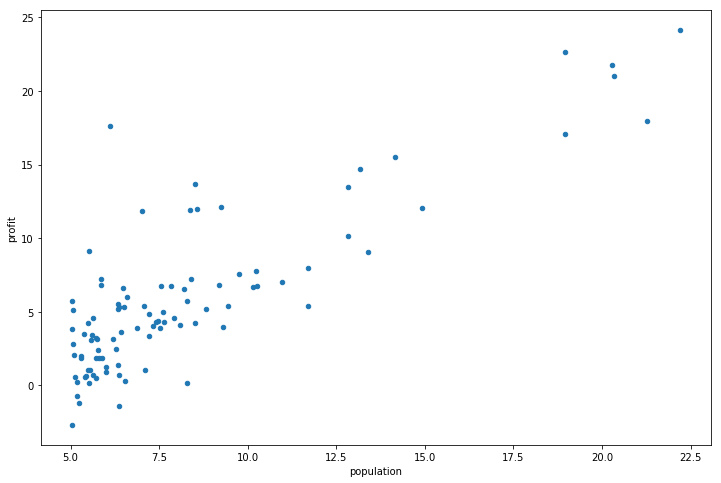

In [293]:
%matplotlib inline
'''
import matplotlib.pyplot as plt 
x= data['population']
y= data['profit']

plt.plot(x,y,'rx')
plt.ylabel('profit in $10,000s')
plt.xlabel('population in 10,000s')
plt.show()
'''


data.plot(x='population',y='profit',kind='scatter', figsize=(12,8))


## Object for linear regression is to minimize the cost function

$$J(\theta)=\frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

where $h_{\theta}(x)$ is given by the linear model:

$$ h_{\theta}(x) = \theta^T x = \theta_0+\theta_1 x_1$$


In [294]:
def computeCost(X,Y, theta ):
    inner= np.power(((X*theta.T)-Y),2)
    return np.sum(inner)/(2*len(X))

def h(theta, x ):
    return theta*x.T

In [295]:
data.insert(0,'Ones',1)

In [296]:
data.head()

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [297]:
x=data.iloc[:,0:2]
y=data.iloc[:,2:3]
print("x=", x.head()," \n y=", y.head())

X= np.matrix(x.values)
Y= np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

x=    Ones  population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598  
 y=     profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


In [298]:
theta.shape, X.shape, Y.shape


((1, 2), (97, 2), (97, 1))

In [299]:
computeCost(X,Y, theta )

32.072733877455676

# Update $\theta$ with step $\alpha$ (learning rate ) to minimize $J(\theta)$

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)}) x_j^{(i)} $$

In [300]:
alpha = 1e-2
iteration = 1000
error = 1e-8

def gradientDescent( X,Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - Y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        #print(theta)
        cost[i] = computeCost(X, Y, theta)
        
    return theta, cost
    
g, cost = gradientDescent(X,Y, theta, alpha, iteration)

g

matrix([[-3.24140214,  1.1272942 ]])

In [301]:
computeCost(X, Y, g)

4.515955503078912

plot linear line with opimized $\theta$

Text(0.5,1,'Predicted Profit vs. Population Size')

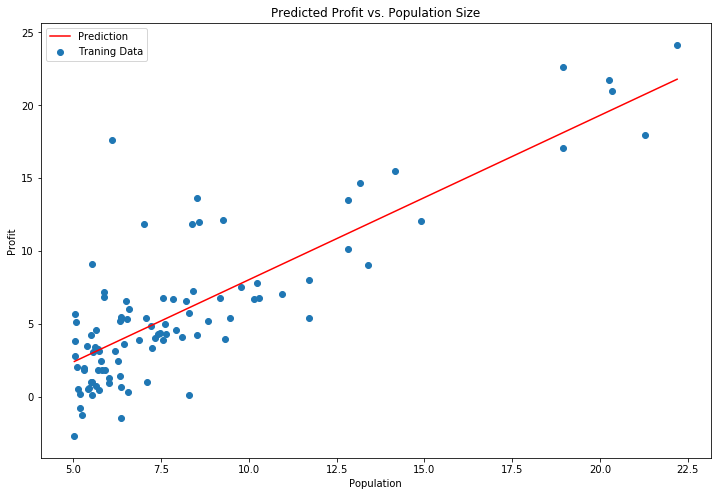

In [302]:
x = np.linspace(data.population.min(), data.population.max(),100)
predict = g[0,0]+ g[0, 1]*x 

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, predict, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


## Visualizing $J(\theta)$

Text(0.5,1,'Error vs. Training Epoch')

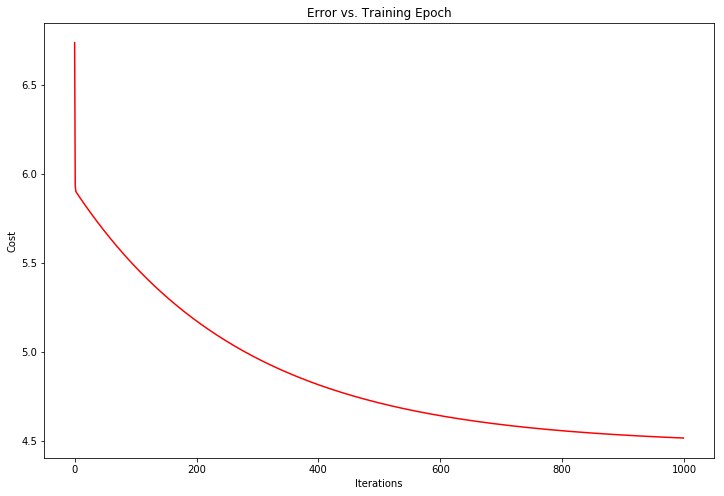

In [303]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iteration), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Linear regression with multiple variables


In [304]:
data2 = pd.read_csv('./ex1data2.csv', delimiter=',',
                  names=['size','bedroom','price'])
data2.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [305]:
def featureNormalize(X, Y):
    row, col  = X.shape
    
    #for i in range(col):
     #   X.iloc[:,i]=(X.iloc[:,i]-X.iloc[:,i].mean())/X.iloc[:,i].std()
    
    X = (X-X.mean())/X.std()
    Y = (Y-Y.mean())/Y.std()
    
    #print(X)
    return X,Y 



In [306]:
x,y =  featureNormalize(data2.iloc[:,0:2],data2.iloc[:,2:3])
x.insert(0,'ones',1)
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [307]:

g, cost = gradientDescent(x,y ,theta, 0.01, iteration)

computeCost(x,y,g),g

(0.13070336960771892,
 matrix([[-1.11045924e-16,  8.78503652e-01, -4.69166570e-02]]))

Text(0.5,1,'Error vs. Training Epoch')

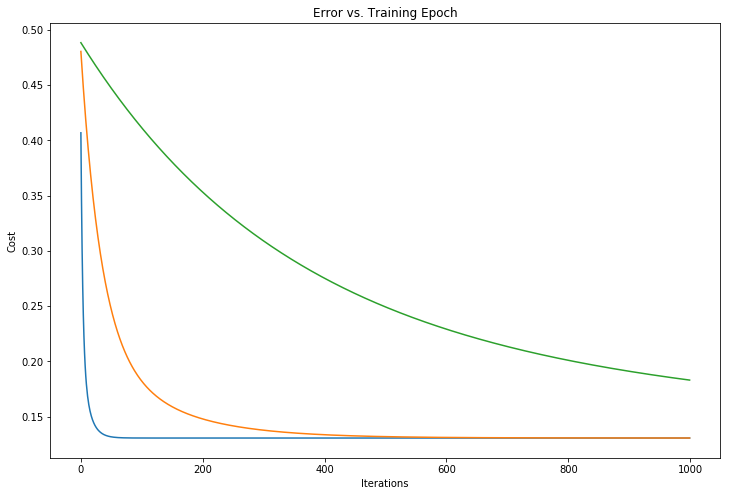

In [308]:
fig, ax = plt.subplots(figsize=(12,8))
for i in [.1,0.01,0.001]:
    g, cost = gradientDescent(x,y ,theta, i, iteration)
    ax.plot(np.arange(iteration), cost)
    

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# predict price of house 1650 sqfeet and 3 bedrooms

In [309]:
g, cost = gradientDescent(x,y ,theta, 0.01, iteration)

xtest = np.array([1650,3])
xtestscaled = (xtest- data2.iloc[:,0:2].mean())/data2.iloc[:,0:2].std()
xtestscaled = np.matrix(xtestscaled.values)

ones = np.ones((1,1))
xtestscaled = np.hstack((ones,xtestscaled))

#print( xtestscaled,g)
pre_y= h(g, xtestscaled)
#print(pre_y[0,0])
pre_y = pre_y [0,0]* data2.iloc[:,2:3].std()+ data2.iloc[:,2:3].mean()
pre_y

price    293251.857518
dtype: float64

## compare with sklearn Linear Regression model


In [310]:
from sklearn import linear_model

x=data2.iloc[:,0:2].values.reshape(-1,2)

y=data2.iloc[:,2:3]
model = linear_model.LinearRegression()


model.fit(x, y)

pre_y = model.predict([[1650,3]])
print( " predicted y (price) ", pre_y[0,0])

 predicted y (price)  293081.4643348962
